# The notebook will follow this structure (which coincides with the structure of this Exercise):

### 1.Importing libraries and data

### 2.Data cleaning

### 3.Data prep for regression analysis (generatting necessary NumPy Array and Test/Train Datasets)

### 4.Regression analysis

### 5. One of the questions which we wanted to resolve is "How do behavioral factors contribute to high systolic blood pressure in relation to outdoor air pollution?"¶

### 6. Comparison of the regression model's performance in predicting 'High systolic blood pressure' divided between the Low Group and the High Group by behavioral factors.¶

## Hypothesis to test: "Associations between long-term exposure to air pollution and blood pressure and effect modifications by lifestyle factors"

### 1. Importing libreries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Define the path to the data files
path = r'/Users/milivanili/Desktop/CF Document 6'

In [3]:

# Import the df_death_pop_income.csv data

df_cause = pd.read_csv(os.path.join(path,'01 Data','Prepared Data','df_cause_income.csv'))

In [4]:
print(df_cause.head())
print(df_cause.info())
print(df_cause.shape)

   Unnamed: 0.1  Unnamed: 0      Country Country Code  Year  \
0             0           0  Afghanistan          AFG  1990   
1             1           1  Afghanistan          AFG  1991   
2             2           2  Afghanistan          AFG  1992   
3             3           3  Afghanistan          AFG  1993   
4             4           4  Afghanistan          AFG  1994   

   Outdoor air pollution  High systolic blood pressure  Diet high in sodium   \
0                   3169                         25633                  1045   
1                   3222                         25872                  1055   
2                   3395                         26309                  1075   
3                   3623                         26961                  1103   
4                   3788                         27658                  1134   

   Diet low in whole grains  Alcohol use  ...  Non-exclusive breastfeeding  \
0                      7077          356  ...                 

In [5]:
#Dropping column Normalizing death count by size of population
df_cause=df_cause.drop(columns=['Unnamed: 0.1','Unnamed: 0','Environmental Factors','Lifestyle Factors','Health Conditions','Maternal and Child Health'])

### 2. Cleaning data

In [6]:
#Check for missing values
missing_values = df_cause.isnull().sum()

In [7]:
missing_values

Country                                       0
Country Code                                 30
Year                                          0
Outdoor air pollution                         0
High systolic blood pressure                  0
Diet high in sodium                           0
Diet low in whole grains                      0
Alcohol use                                   0
Diet low in fruits                            0
Unsafe water source                           0
Secondhand smoke                              0
Low birth weight                              0
Child wasting                                 0
Unsafe sex                                    0
Diet low in nuts and seeds                    0
Household air pollution from solid fuels      0
Diet low in Vegetables                        0
Low physical activity                         0
Smoking                                       0
High fasting plasma glucose                   0
Air pollution                           

In [8]:
# Check for missing values in the Population and IncomeGroup columns
missing_values = df_cause[['Population', 'IncomeGroup']].isnull().sum()

In [9]:
# Interpolate missing population values
df_cause['Population'] = df_cause['Population'].interpolate(method='linear')


In [10]:
# Use forward fill and backward fill to fill missing income group values
df_cause['IncomeGroup'] = df_cause['IncomeGroup'].fillna(method='ffill').fillna(method='bfill')

/var/folders/3n/vp5_vxxd66d3_nhm1qw9k_580000gn/T/ipykernel_65451/1900568951.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cause['IncomeGroup'] = df_cause['IncomeGroup'].fillna(method='ffill').fillna(method='bfill')


In [11]:
# Verify that there are no more missing values in Population and IncomeGroup
missing_values_after = df_cause[['Population', 'IncomeGroup']].isnull().sum()

missing_values_after

Population     0
IncomeGroup    0
dtype: int64

#### Normalizing death count by size of population

In [12]:
# Updated list of columns related to death counts, based on the exact column names in the dataframe
death_count_columns_updated = [
 'Outdoor air pollution',
 'High systolic blood pressure',
 'Diet high in sodium ',
 'Diet low in whole grains',
 'Alcohol use',
 'Diet low in fruits',
 'Unsafe water source',
 'Secondhand smoke',
 'Low birth weight',
 'Child wasting',
 'Unsafe sex',
 'Diet low in nuts and seeds',
 'Household air pollution from solid fuels',
 'Diet low in Vegetables',
 'Low physical activity',
 'Smoking',
 'High fasting plasma glucose',
 'Air pollution',
 'High body mass index',
 'Unsafe sanitation',
 'No access to handwashing facility',
 'Drug use',
 'Low bone mineral density',
 'Vitamin A deficiency',
 'Child stunted growt',
 'Discontinued breastfeeding',
 'Non-exclusive breastfeeding',
 'Iron deficiency']

# Normalize the death count columns by the population column
for column in death_count_columns_updated:
    df_cause[column] = df_cause[column] / df_cause['Population']

# Display the first few rows to verify the normalization
df_cause.head()

,Country,Country Code,Year,Outdoor air pollution,High systolic blood pressure,Diet high in sodium,Diet low in whole grains,Alcohol use,Diet low in fruits,Unsafe water source,...,Low bone mineral density,Vitamin A deficiency,Child stunted growt,Discontinued breastfeeding,Non-exclusive breastfeeding,Iron deficiency,Continents,Decade,Population,IncomeGroup
0,Afghanistan,AFG,1990,0.000296,0.002397,0.000098,0.000662,0.000033,0.000298,0.000346,...,0.000036,0.000189,0.000719,0.000010,0.000207,0.000053,Asia,90s,10694796.0,Low income
1,Afghanistan,AFG,1991,0.000300,0.002408,0.000098,0.000665,0.000034,0.000302,0.000401,...,0.000036,0.000191,0.000734,0.000011,0.000233,0.000057,Asia,90s,10745167.0,Low income
2,Afghanistan,AFG,1992,0.000282,0.002182,0.000089,0.000605,0.000031,0.000278,0.000444,...,0.000033,0.000174,0.000711,0.000012,0.000253,0.000058,Asia,90s,12057433.0,Low income
3,Afghanistan,AFG,1993,0.000259,0.001925,0.000079,0.000535,0.000028,0.000249,0.000511,...,0.000029,0.000165,0.000705,0.000015,0.000266,0.000055,Asia,90s,14003760.0,Low income
4,Afghanistan,AFG,1994,0.000245,0.001790,0.000073,0.000498,0.000026,0.000234,0.000465,...,0.000027,0.000172,0.000714,0.000013,0.000248,0.000053,Asia,90s,15455555.0,Low income


In [13]:
dups = df_cause.duplicated()
dups.shape
#no dups found

(6150,)

### Extreme values

/var/folders/3n/vp5_vxxd66d3_nhm1qw9k_580000gn/T/ipykernel_65451/2540123477.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cause['High systolic blood pressure'], bins=25) # Shows extreme values
/Users/milivanili/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='High systolic blood pressure', ylabel='Density'>

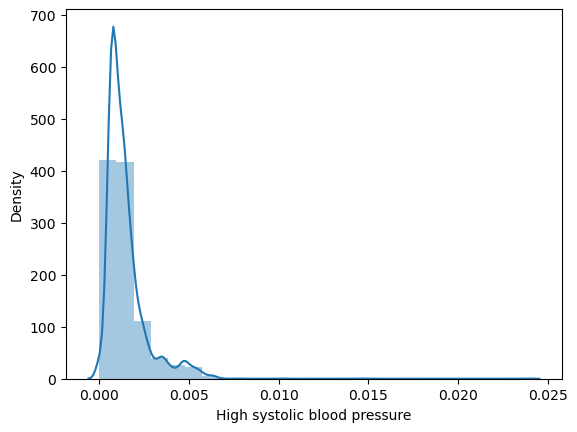

In [14]:
sns.distplot(df_cause['High systolic blood pressure'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

### 3.  Data prep for regression analyses

In [15]:
df_cause['High systolic blood pressure'].mean() # Check the mean

0.0014601315373227713

In [16]:
df_cause['High systolic blood pressure'].median() #Check the median

0.0011474242807706322

In [17]:
df_cause['High systolic blood pressure'].max()  #Check the maximun

0.02393258101078439

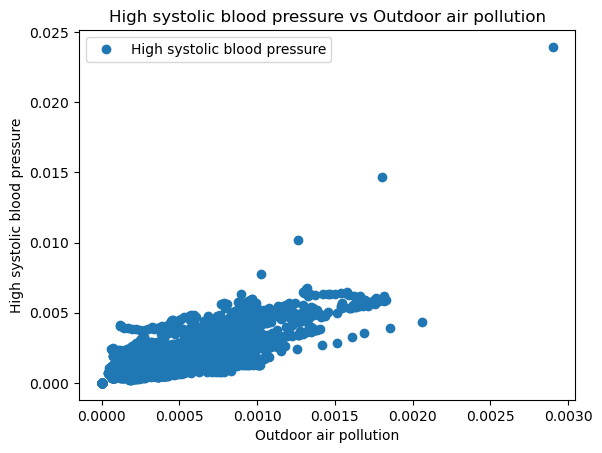

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_cause.plot(x = 'Outdoor air pollution', y='High systolic blood pressure',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('High systolic blood pressure vs Outdoor air pollution')  
plt.xlabel('Outdoor air pollution')  
plt.ylabel('High systolic blood pressure')  
plt.show()

COMMENT

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_cause['Outdoor air pollution'].values.reshape(-1,1)
y = df_cause['High systolic blood pressure'].values.reshape(-1,1)

In [20]:
X

array([[0.00029631],
       [0.00029986],
       [0.00028157],
       ...,
       [0.00018304],
       [0.00017732],
       [0.00017454]])

In [21]:
y

array([[0.00239677],
       [0.00240778],
       [0.00218197],
       ...,
       [0.00080123],
       [0.00079736],
       [0.00079722]])

In [22]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4.Regression analyses

In [23]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [24]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

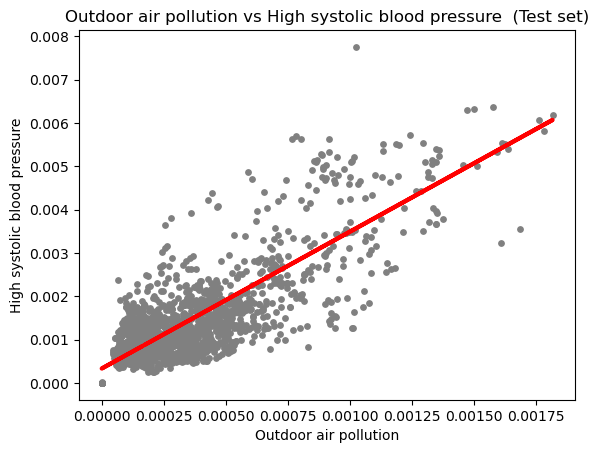

In [26]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Outdoor air pollution vs High systolic blood pressure  (Test set)')
plot_test.xlabel('Outdoor air pollution')
plot_test.ylabel('High systolic blood pressure')
plot_test.show()

COMMENT

In [27]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [28]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.15950505]]
Mean squared error:  4.3495361116698946e-07
R2 score:  0.6133699254760094


In [29]:
y_predicted

array([[0.00090099],
       [0.00091573],
       [0.00195916],
       ...,
       [0.00071338],
       [0.00056722],
       [0.00083437]])

In [30]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.000803,0.000901
1,0.000899,0.000916
2,0.001658,0.001959
3,0.000341,0.000895
4,0.001005,0.001342
5,0.000003,0.000332
6,0.001607,0.001654
7,0.000551,0.000663
8,0.001812,0.002026
9,0.001219,0.001687


### Compare how the regression fits the training set¶

In [31]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.15950505]]
Mean squared error:  5.343513232148238e-07
R2 score:  0.6147056858361459


The MSE is....

The  slope not consistent across both sets confirms 

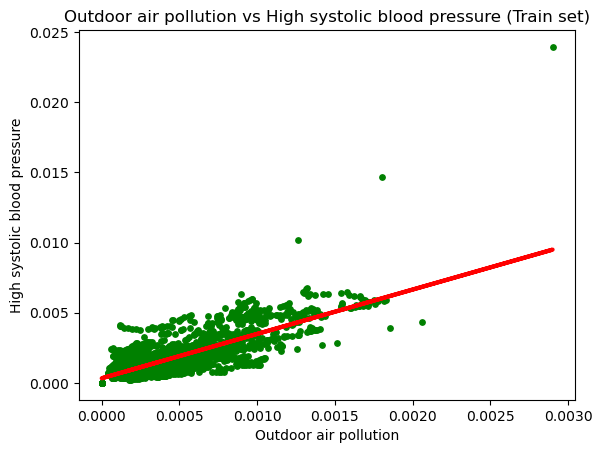

In [34]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Outdoor air pollution vs High systolic blood pressure (Train set)')
plot_test.xlabel('Outdoor air pollution')
plot_test.ylabel('High systolic blood pressure')
plot_test.show()

The training data shows that the regression model reflects .....connection between outdoor air pollution and high systolic blood pressure. However, the model could be improved for better accuracy and reliability as indicated by a slightly higher mean squared error (MSE) and some deviations from the regression line.¶


### Bonus: performance improvement after removing outliers

/var/folders/3n/vp5_vxxd66d3_nhm1qw9k_580000gn/T/ipykernel_65451/811191986.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cause['High systolic blood pressure'], bins=25) # Shows extreme values
/Users/milivanili/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='High systolic blood pressure', ylabel='Density'>

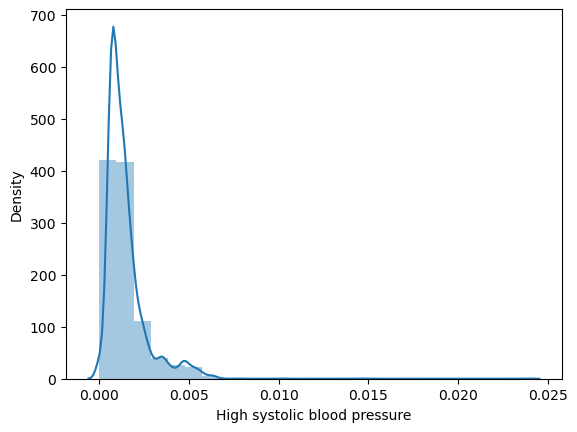

In [35]:
sns.distplot(df_cause['High systolic blood pressure'], bins=25) # Shows extreme values

In [36]:
df_cleaned = df_cause[df_cause['High systolic blood pressure']<=0.032]

In [37]:
# Prepare the cleaned data
X_cleaned = df_cleaned[['Outdoor air pollution']].values
y_cleaned = df_cleaned['High systolic blood pressure'].values


In [38]:
# Split the cleaned data (70% training, 30% test)
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.3, random_state=42)


In [39]:
# Train the regression model on the cleaned dataset
regression_cleaned = LinearRegression()

In [40]:
regression_cleaned.fit(X_train_cleaned, y_train_cleaned)

LinearRegression()

In [41]:
y_pred_cleaned = regression_cleaned.predict(X_test_cleaned)

In [42]:
# Evaluate the cleaned model
mse_cleaned = mean_squared_error(y_test_cleaned, y_pred_cleaned)
r2_cleaned = r2_score(y_test_cleaned, y_pred_cleaned)

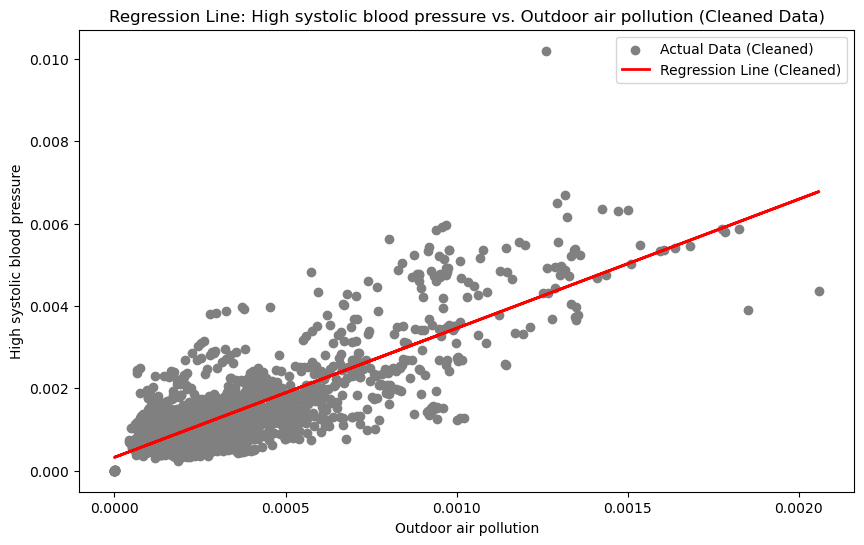

(4.450632550415261e-07, 0.6247464714107989)

In [43]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test_cleaned, y_test_cleaned, color='gray', label='Actual Data (Cleaned)')
plt.plot(X_test_cleaned, y_pred_cleaned, color='red', linewidth=2, label='Regression Line (Cleaned)')
plt.title('Regression Line: High systolic blood pressure vs. Outdoor air pollution (Cleaned Data)')
plt.xlabel('Outdoor air pollution')
plt.ylabel('High systolic blood pressure')
plt.legend()
plt.show()

mse_cleaned, r2_cleaned

In [44]:
data = pd.DataFrame({'Actual': y_test_cleaned.flatten(), 'Predicted': y_pred_cleaned.flatten()})
data.head(30)

,Actual,Predicted
0,0.000433,0.000615
1,0.000758,0.000888
2,0.001276,0.001275
3,0.000770,0.001642
4,0.002324,0.002532
5,0.000952,0.001103
6,0.000940,0.001215
7,0.001634,0.000666
8,0.001186,0.000528
9,0.000451,0.001451


### 5. One of the questions which we wanted to resolve is "How do behavioral factors contribute to high systolic blood pressure in relation to outdoor air pollution?"

Mean Squared Error (MSE): 1.222623397659801e-07
R-squared (R²): 0.8868867083767228
Coefficients:
                       Coefficient
Outdoor air pollution     0.809928
Smoking                   0.165141
Alcohol use               0.671300
Diet high in sodium       0.632536
Low physical activity     1.083350
High body mass index      0.676765


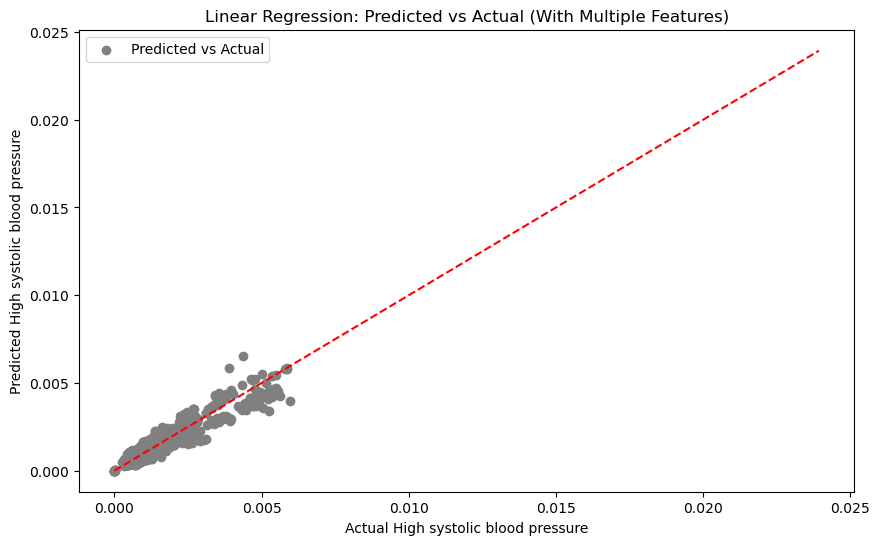

In [45]:

# Define the features (independent variables) and the target (dependent variable)
X = df_cleaned[['Outdoor air pollution', 'Smoking', 'Alcohol use', 'Diet high in sodium ', 'Low physical activity', 'High body mass index']]
y = df_cleaned['High systolic blood pressure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Display the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Coefficients:")
print(coefficients)

# Plot the regression results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='grey', label='Predicted vs Actual')
plt.xlabel('Actual High systolic blood pressure')
plt.ylabel('Predicted High systolic blood pressure')
plt.title('Linear Regression: Predicted vs Actual (With Multiple Features)')
plt.legend()
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()


### The scatter plot shows a tight clustering of data points around the red dashed line, indicating a strong correlation between the predicted and actual values.
 
 #### The model demonstrates a strong fit as indicated by the high R² value of 0.88, suggesting it explains a large portion of the variability in high systolic blood pressure.

#### Low physical activity has the highest coefficient  1.083350, making it the strongest predictor among the variables. 

#### Outdoor air pollution exibits strong predictors.

#### 'Diet high in sodium , High BMI and Alcohol use moderate positive correlations, emphasizing the significance of diet and weight management in regulating high systolic blood pressure.

#### Smoking has a positive correlation with high systolic blood pressure, but its impact is relatively weaker compared to other factors.


### 6. Comparison of the regression model's performance in predicting 'High systolic blood pressure' divided between the Low Group and the High Group by behavioral factors.


Low Group - Mean Squared Error: 2.1404260954674666e-08, R2 Score: 0.6263366097313168
Low Group - Coefficients:
Outdoor air pollution: 0.255
Smoking: 0.063
Alcohol use: 0.258
Diet high in sodium: 1.346
Low physical activity: 1.553
High body mass index: 0.267
High Group - Mean Squared Error: 2.1261233944948916e-07, R2 Score: 0.8494478524777608
High Group - Coefficients:
Outdoor air pollution: 0.867
Smoking: 0.156
Alcohol use: 0.845
Diet high in sodium: 0.447
Low physical activity: 0.742
High body mass index: 0.679


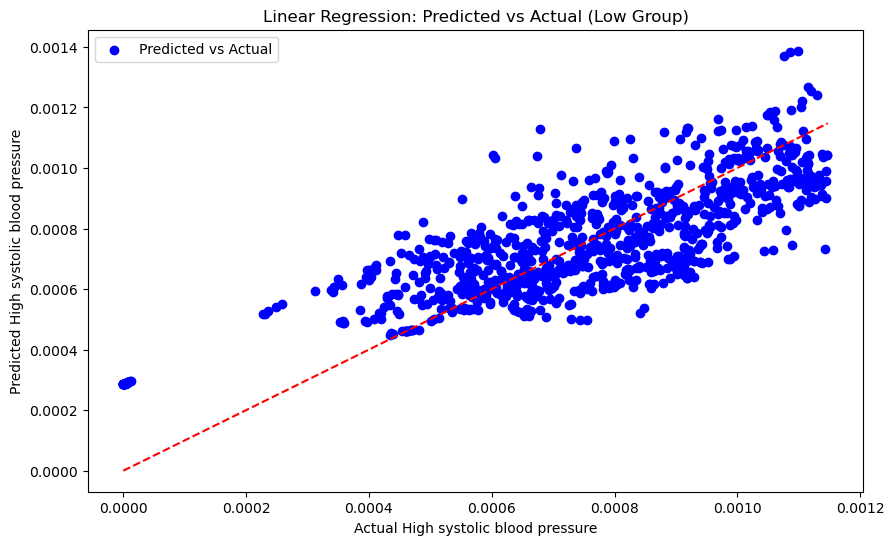

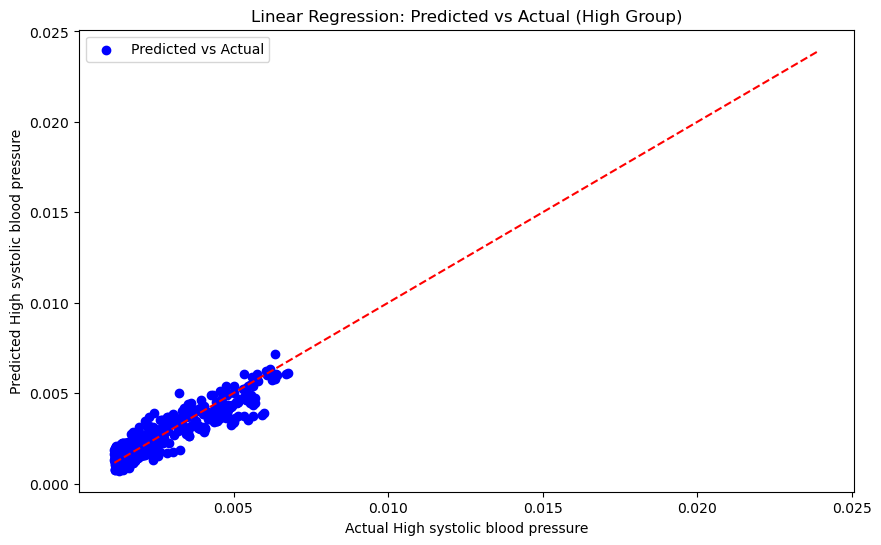

In [54]:

#Spliting prediction multiple features into low and high group


# Define the features and target
features = ['Outdoor air pollution', 'Smoking', 'Alcohol use', 'Diet high in sodium', 'Low physical activity', 'High body mass index']
target = 'High systolic blood pressure'

# Splitting the data into low and high groups based on the median of the target variable
threshold = df_cleaned[target].median()
low_group = df_cleaned[df_cleaned[target] <= threshold]
high_group = df_cleaned[df_cleaned[target] > threshold]

# Prepare the data for low group
X_low = low_group[features].values
y_low = low_group[target].values

# Prepare the data for high group
X_high = high_group[features].values
y_high = high_group[target].values

# Split the data (70% training, 30% test) for low group
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low, test_size=0.3, random_state=42)

# Split the data (70% training, 30% test) for high group
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X_high, y_high, test_size=0.3, random_state=42)

# Initialize and train the regression model for low group
regression_low = LinearRegression()
regression_low.fit(X_train_low, y_train_low)
y_pred_low = regression_low.predict(X_test_low)

# Initialize and train the regression model for high group
regression_high = LinearRegression()
regression_high.fit(X_train_high, y_train_high)
y_pred_high = regression_high.predict(X_test_high)

# Evaluate the models
mse_low = mean_squared_error(y_test_low, y_pred_low)
r2_low = r2_score(y_test_low, y_pred_low)
mse_high = mean_squared_error(y_test_high, y_pred_high)
r2_high = r2_score(y_test_high, y_pred_high)

# Print the results
print(f'Low Group - Mean Squared Error: {mse_low}, R2 Score: {r2_low}')
print('Low Group - Coefficients:')
for feature, coef in zip(features, regression_low.coef_):
    print(f'{feature}: {coef:.3f}')

print(f'High Group - Mean Squared Error: {mse_high}, R2 Score: {r2_high}')
print('High Group - Coefficients:')
for feature, coef in zip(features, regression_high.coef_):
    print(f'{feature}: {coef:.3f}')

# Plot the regression results for low group
plt.figure(figsize=(10, 6))
plt.scatter(y_test_low, y_pred_low, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual High systolic blood pressure')
plt.ylabel('Predicted High systolic blood pressure')
plt.title('Linear Regression: Predicted vs Actual (Low Group)')
plt.legend()
plt.plot([y_low.min(), y_low.max()], [y_low.min(), y_low.max()], color='red', linestyle='--')
plt.show()

# Plot the regression results for high group
plt.figure(figsize=(10, 6))
plt.scatter(y_test_high, y_pred_high, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual High systolic blood pressure')
plt.ylabel('Predicted High systolic blood pressure')
plt.title('Linear Regression: Predicted vs Actual (High Group)')
plt.legend()
plt.plot([y_high.min(), y_high.max()], [y_high.min(), y_high.max()], color='red', linestyle='--')
plt.show()


#### The "High Group" model performs better (R² = 0.849) compared to the "Low Group" model (R² = 0.626), indicating that the predictors explain more variability in high pollution conditions.
#### Lower MSE values in both groups show that the predictions are reasonably accurate.
#### The model fits better for the high group, indicating more reliable predictions for higher systolic blood pressure values.


### LOW Group
#### Low physical activity (1.553) and diet high in sodium (1.346) have the largest positive coefficients, suggesting they are the most influential factors.
#### Smoking (0.063) has the smallest positive coefficient, indicating a relatively weaker influence.

### HIGH Group

#### Outdoor air pollution (0.867) and alcohol use (0.845) have the largest positive coefficients, suggesting they are the most influential factors.
#### Smoking (0.156) again has a smaller positive coefficient, indicating a relatively weaker influence, though more than in the low group.